## LEAD SCORING CASE STUDY

### STEPS
1. DATA IMPORTING UNDERSTAND
2. DATA PREPARATION
3. TRAIN-TEST SPLIT
4. MODEL BUILDING
5. FEATURE SELECTION USING RFE
6. MODEL EVALUATION
7. MAKING PREDICTION ON TEST SET
8. EVALUATION OF TEST SET
9. CONCLUSION

### 1.DATA IMPORTING & UNDERSTANDING

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


In [63]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [64]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [65]:
df.shape

(9240, 37)

In [66]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2. DATA PREPARATION 

In [68]:
cols=df.columns
cols

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Checking missing values

##### Handling 'Select ' value
We can notice some columns(Specialization,How did you hear about X Education,Lead Profile,City) has 'SELECT' values which means that candidate has not selected any options.This need to be handle because it is as good as null value because in decent amount columns has the 'select' value. We cannot do random guess for replacing the 'select' value,So we can replace the 'select' to 'NaN' .

In [69]:
# Replacing 'Select' with NaN
df=df.replace('Select',np.nan)


##### Dropping missing values
Removing the columns which has null values greater than 45% as these columns have missing values and columns are of no use.


In [70]:
for i in df.columns:
    if (df[i].isnull().sum()/len(df.index)*100)>45:
        print(i)
        df.drop(i,axis=1,inplace=True)        

How did you hear about X Education
Lead Quality
Lead Profile
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score


In [71]:
# Remaining columns having null values
df.isnull().sum().sort_values(ascending=False)/len(df.index) *100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

###### Checking value counts of the columns having missing values >20%

Column name: Country 
 % of Missing value: 27


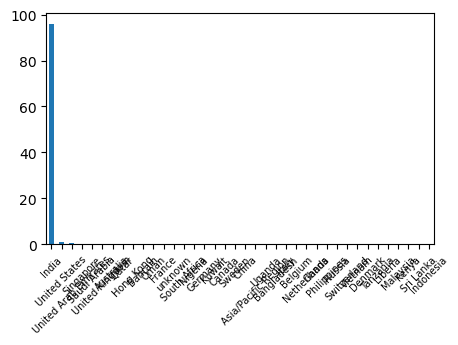

............................................................
Column name: Specialization 
 % of Missing value: 37


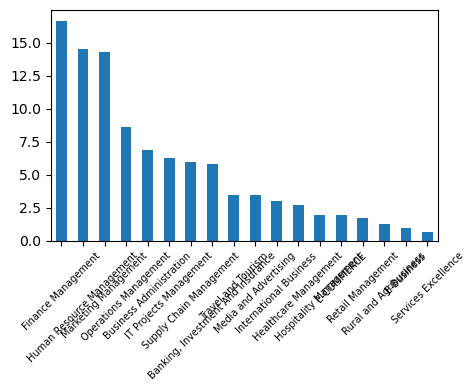

............................................................
Column name: What is your current occupation 
 % of Missing value: 29


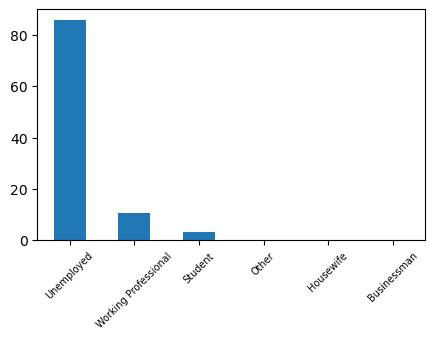

............................................................
Column name: What matters most to you in choosing a course 
 % of Missing value: 29


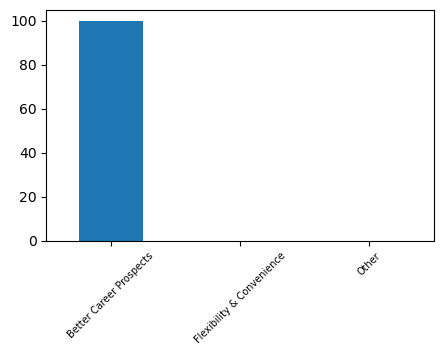

............................................................
Column name: Tags 
 % of Missing value: 36


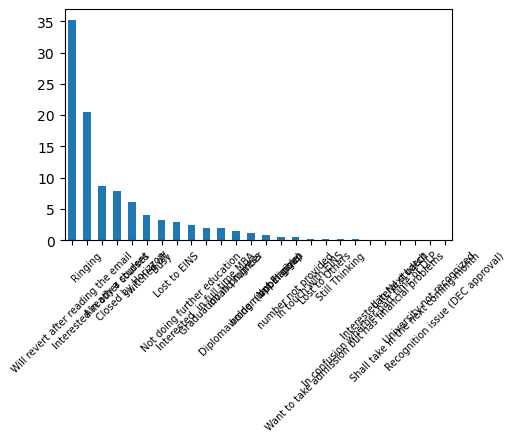

............................................................
Column name: City 
 % of Missing value: 40


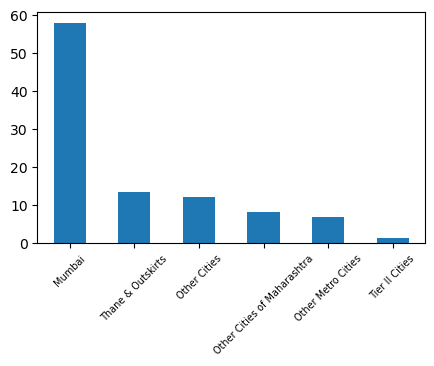

............................................................


In [72]:
for i in df.columns:
    if (df[i].isnull().sum()/len(df.index)*100)>20:
        print('Column name:',i,'\n % of Missing value:',round(df[i].isnull().sum()/len(df.index) *100))
        plt.figure(figsize=(5,3))
        (df[i].value_counts(normalize= True)*100).plot.bar()
        plt.xticks(fontsize=7,rotation=45)
        plt.show()
        print('............................................................')

#### Handling the remaining missing value

##### - Country
- The max no value are india(approx. 90%) and can assume that most of the candidate are indian,Hence removing the column

In [73]:
df=df.drop('Country',axis=1)

##### - Specialization
- Replacing the null values with 'Not provided' ,We cannot replace it with any other value like mode of the column because the 16 % of missing values and around 25% of the value are not provided ('Select') and we will have around 40% of missing data which is change our data if we replace it with other values


In [74]:
df['Specialization']=df['Specialization'].fillna('Not Provided')

##### -  What is your current occupation
- Replacing the null values with 'Not Provided'

In [75]:
df['What is your current occupation']= df['What is your current occupation'].fillna('Not Provided')

##### - What matters most to you in choosing a course
- Replacing the null values with mode of the column,i.e. 'Better Career Prospects' as around 99 % of candidate has choose this option


In [76]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan,df['What matters most to you in choosing a course'].mode()[0])

##### - TAGS 
- Dropping the column
- This column is not adding any value to the data because it just tells the current status of lead 


In [77]:
df=df.drop('Tags',axis=1)

##### - City
- Droping the column as the maximum no of values are from mumbai and the area near mumbai


In [78]:
df=df.drop('City',axis=1)

- Checking the null values

In [79]:
df.isnull().sum().sort_values(ascending= False)/len(df.index)*100

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper Article                                0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
What matters most to you in choosing a course    0.000000
Magazine                                         0.000000
Search        

##### - Dropping the rows of remaing 1-2% of null values as they will not hamper the data.


In [80]:
df=df.dropna()

In [81]:
# checking the null values
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [82]:
df.shape

(9074, 27)

In [83]:
# Checking the remaing columns
print(len(df.columns))
print(df.columns)

27
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


#### Checking & Removing unnecessary columns 
- Checking the columns which can be deleted and are not important
- Selecting the less important columns for dropping

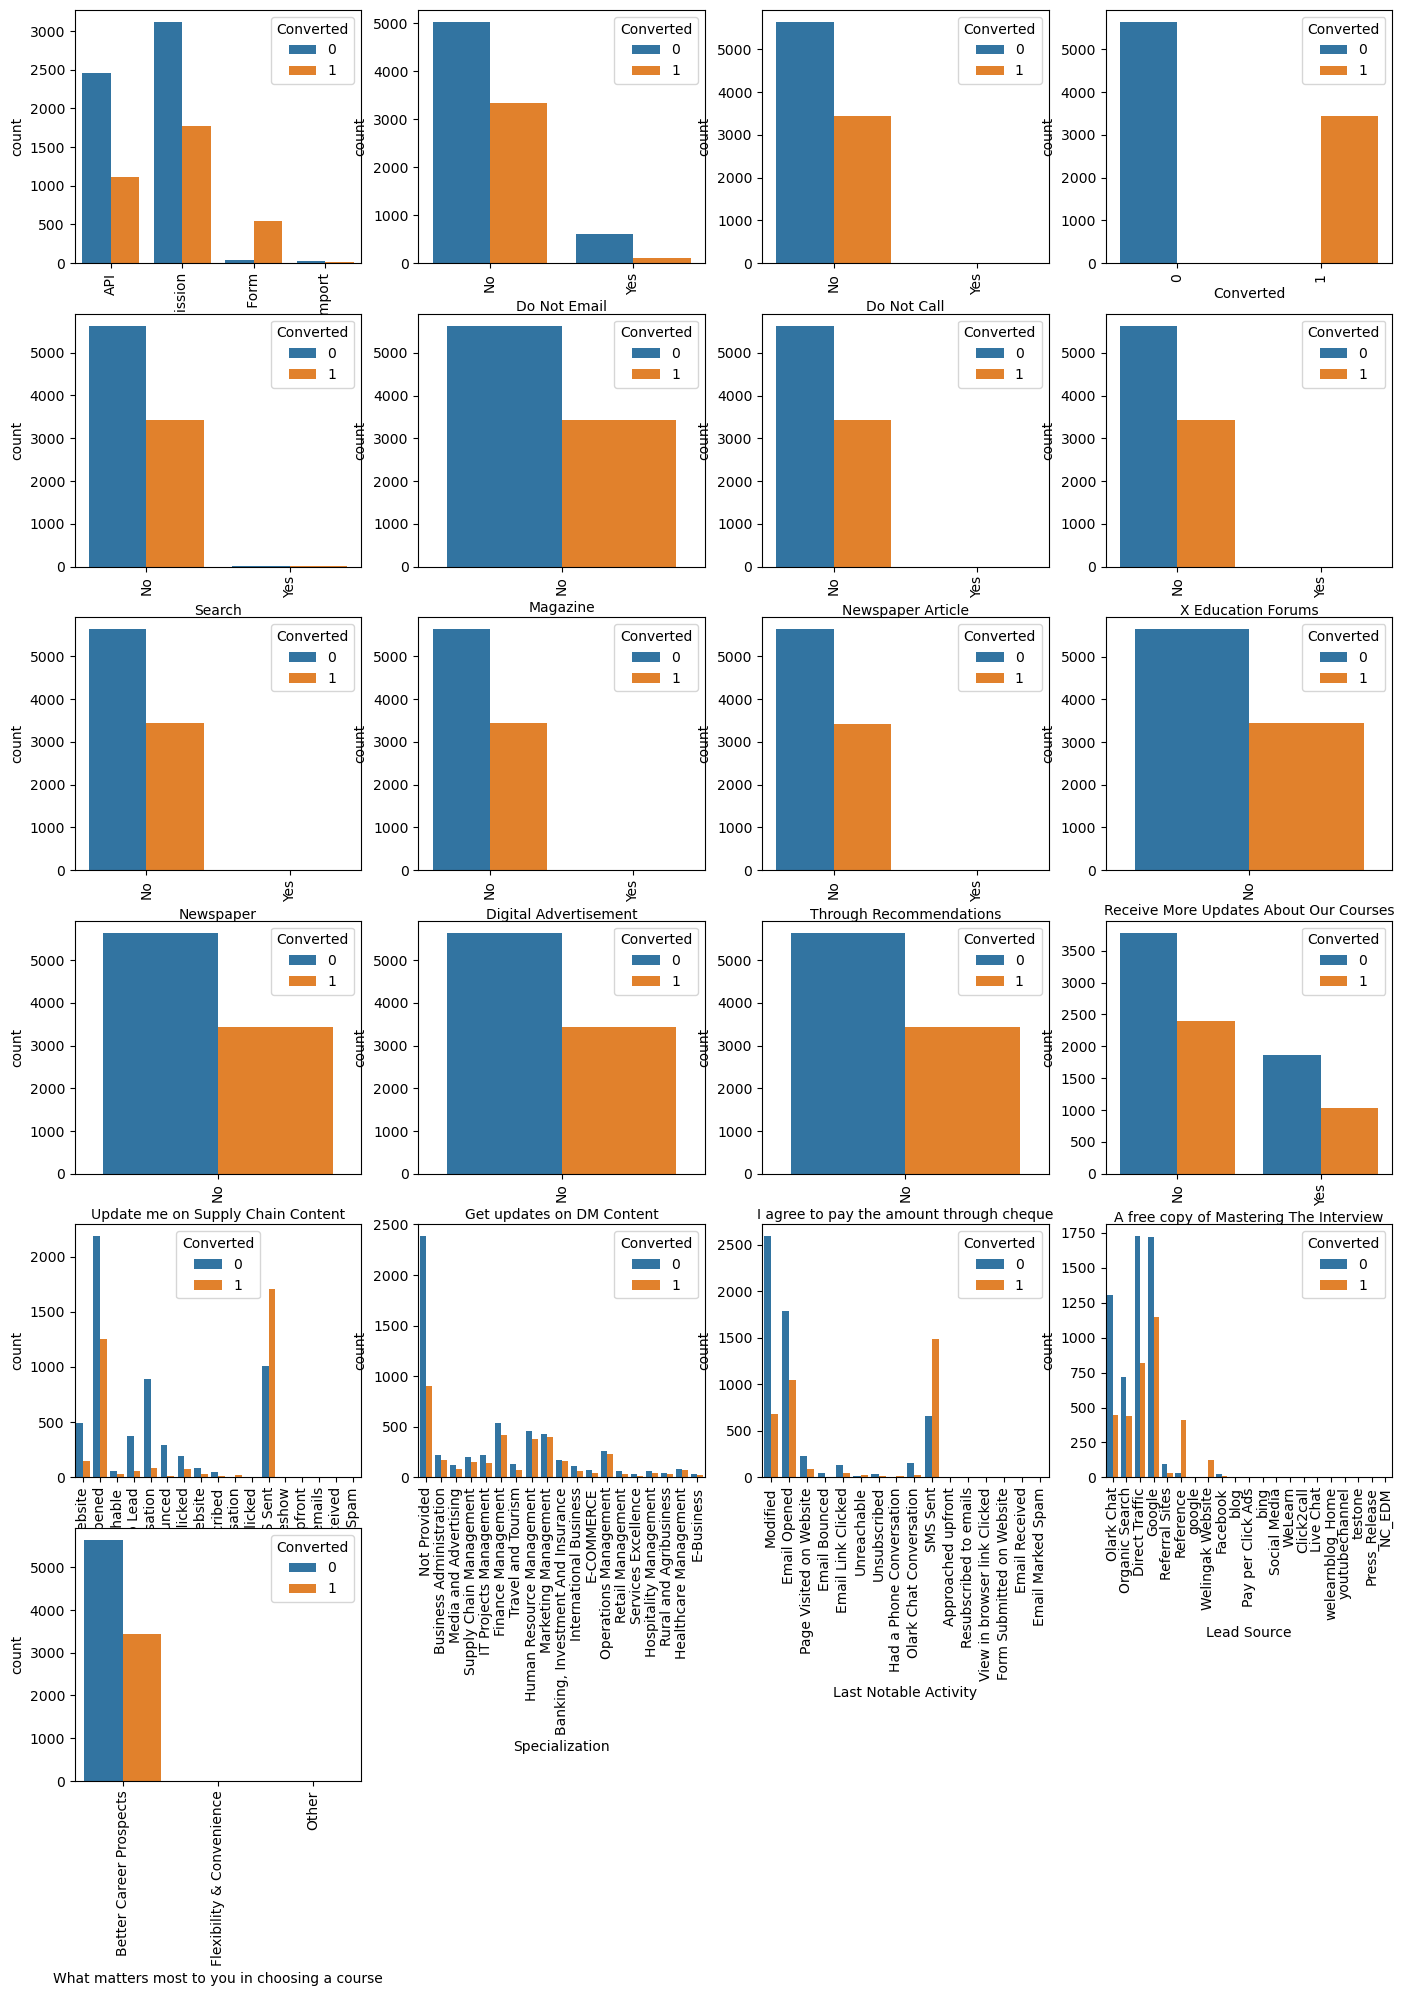

In [84]:
rem_cols=['Lead Origin','Do Not Email', 'Do Not Call', 'Converted',
      'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview','Last Activity',
       'Specialization', 'Last Notable Activity','Lead Source','What matters most to you in choosing a course']

plt.figure(figsize=(17,23))
for col,pl in zip(rem_cols,range(len(rem_cols))):
    plt.subplot(6,4,pl+1)
    sns.countplot(x=(df[col]),hue= df.Converted)
#     plt.title(col)
    plt.xticks(fontsize=10,rotation=90)

#### Since there are some columns which have single value in it and some column will not add any value to the data.So,Dropping the columns
- These columns have single values ('Do Not Call','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque')
- These columns will not add any value to the data as

   1.'A free copy of Mastering The Interview' tells the candidate need the free copy or not
   
   2.'What matters most to you in choosing a course' has almost all the student having the same choice i.e.'Better Career Prospects'
   
   3.'Prospect ID', 'Lead Number' these columns just tells the id and lead no which is not needed in the model
   
   4.'Last Notable Activity', dropping this column as there is similar column with similar usei.e. 'Last Activity'

In [85]:
# Dropping the unnecessary or less important columns
less_imp=['Prospect ID', 'Lead Number','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper',
          'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
          'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','What matters most to you in choosing a course','Last Notable Activity']
df=df.drop(less_imp,axis=1)


In [86]:
df.shape

(9074, 10)

In [87]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed


### Checking outliers

In [88]:
n_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df[n_col].describe(percentiles=[0.10, 0.20, 0.25, 0.50, 0.75, 0.90, 0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000


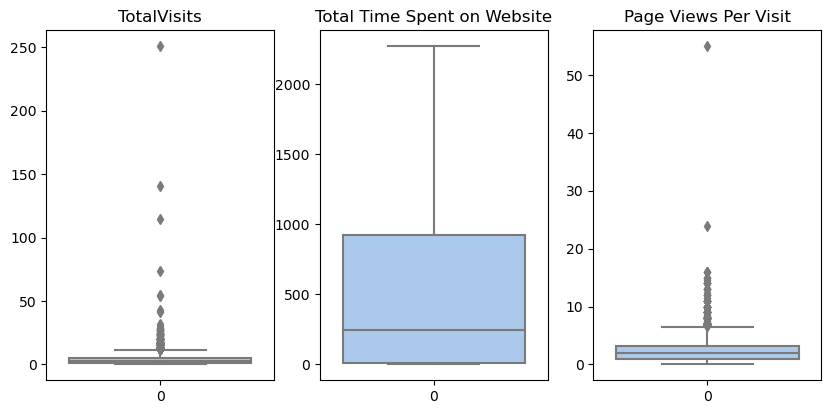

In [89]:
plt.figure(figsize=(10,10))
for col,pl in zip(n_col,range(len(n_col))):
    plt.subplot(2,3,pl+1)
    plt.title(col)
    sns.boxplot(df[col],palette='pastel')

#### - Capping the outliers
- We can see that 'TotalVisits','Page Views Per Visit' has some outliers
- 'Total Time Spent on Website', has outliers which are adjustables 
- capping the data with in 5% to 95 %

In [90]:
# 1.'TotalVisits'
upper_lim=df['TotalVisits'].quantile(0.95)
lower_lim=df['TotalVisits'].quantile(0.05)
df[ 'TotalVisits']=df[ 'TotalVisits'].apply(lambda x: lower_lim if x<lower_lim else(upper_lim if x>upper_lim else x))

In [91]:
# 2.'Page Views Per Visit'
upper_lim=df['Page Views Per Visit'].quantile(0.95)
lower_lim=df['Page Views Per Visit'].quantile(0.05)
df[ 'Page Views Per Visit']=df['Page Views Per Visit'].apply(lambda x: lower_lim if x<lower_lim else(upper_lim if x>upper_lim else x))

#### - Checking the outliers again

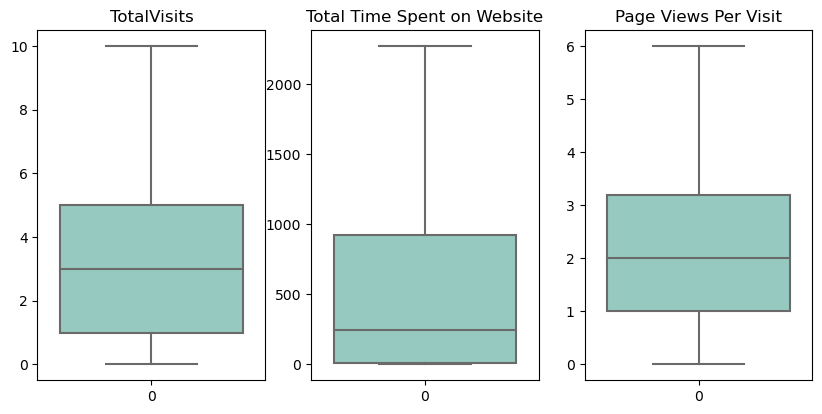

In [92]:
plt.figure(figsize=(10,10))
for col,pl in zip(n_col,range(len(n_col))):
    plt.subplot(2,3,pl+1)
    plt.title(col)
    sns.boxplot(df[col],palette='Set3')

### Visualizing data


#### - Numerical data

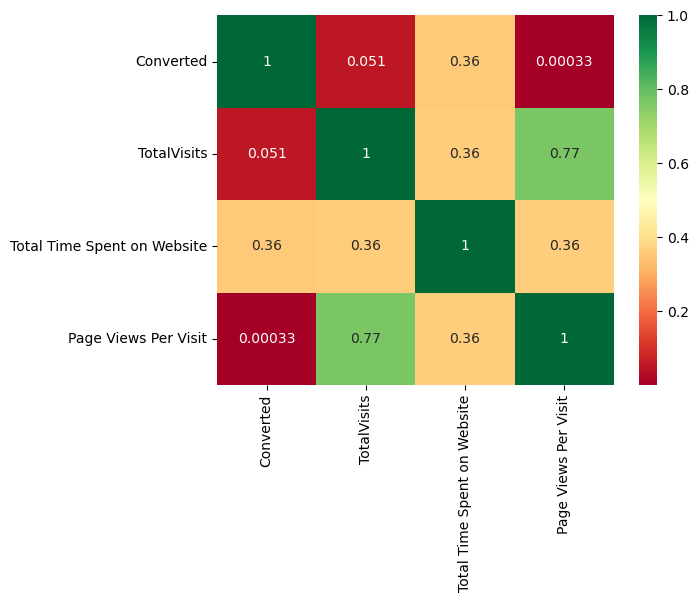

In [93]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

##### - Categorical data

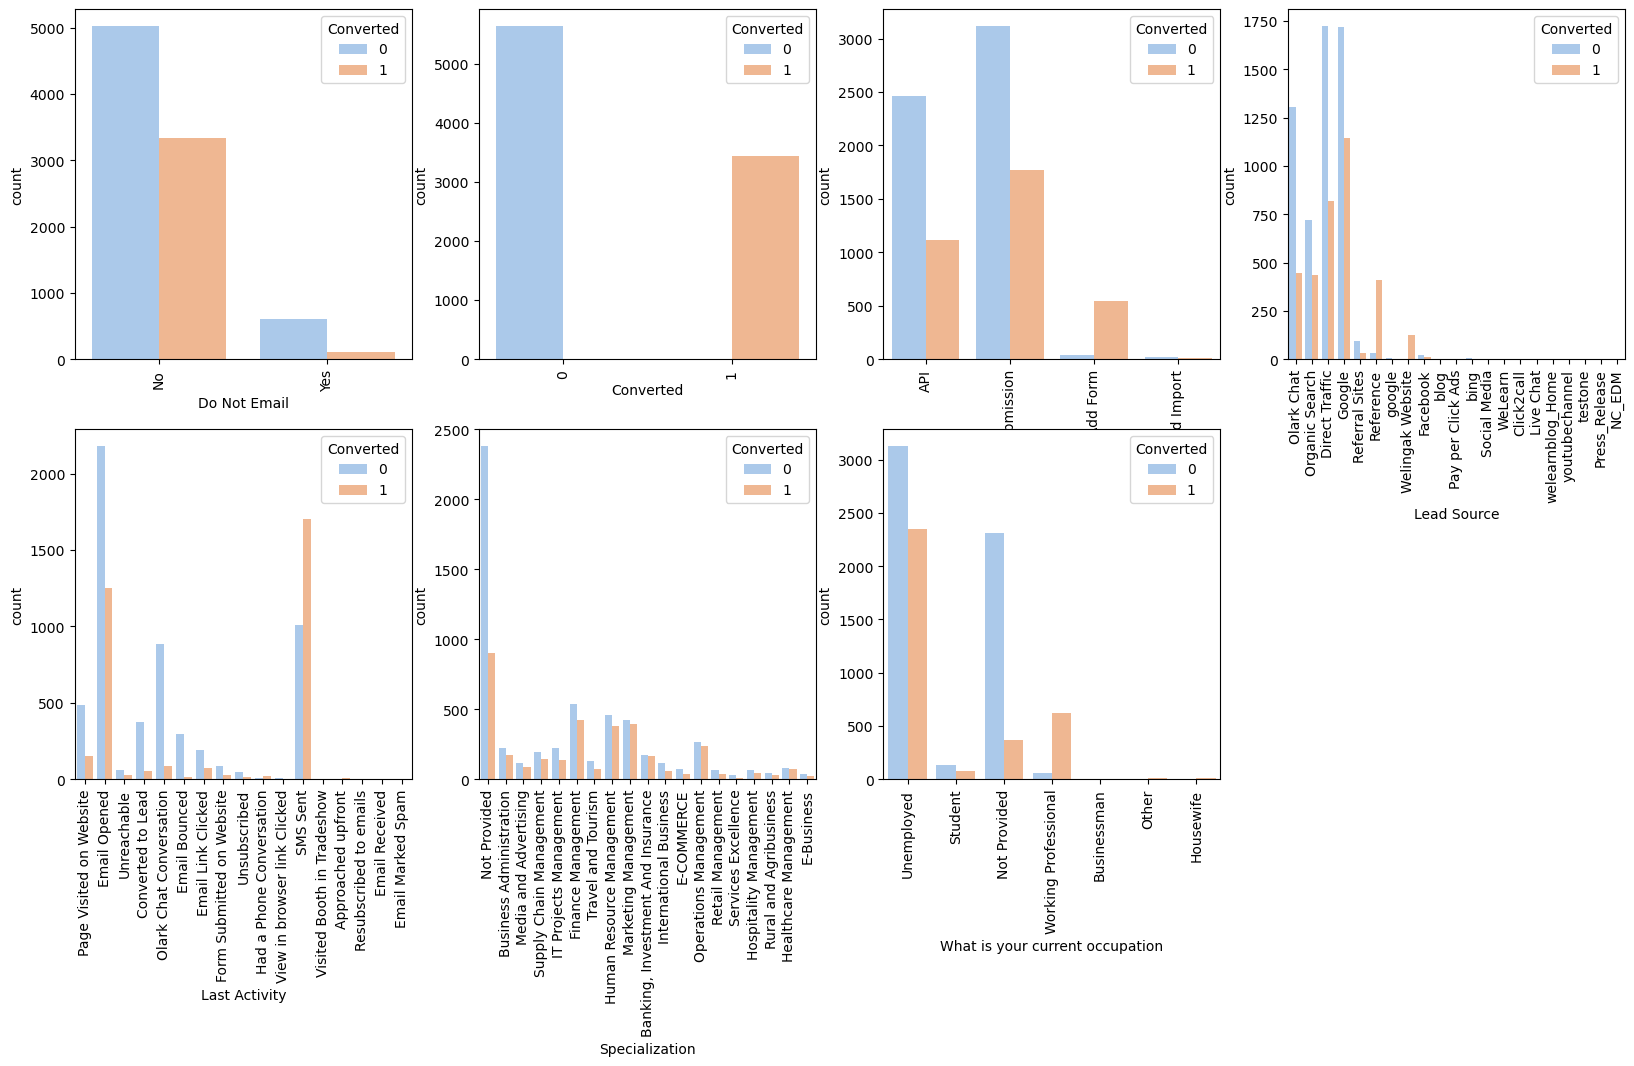

In [94]:
cat_col=['Do Not Email','Converted','Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation']

plt.figure(figsize=(20,10))
for col,pl in zip(cat_col,range(len(cat_col))):
    plt.subplot(2,4,pl+1)
    sns.countplot(x=(df[col]),hue= df.Converted,palette='pastel')
#     plt.title(col)
    plt.xticks(fontsize=10,rotation=90)

### Modifying the columns for making dummy variables

##### 1. Lead Origin
- No modification needed in the 'Lead Origin'

In [95]:
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

##### 2. Lead Source
- combining the same values,combining the less occuring,low frequency values and platforms which are almost similar to other category,doing this will create less confusion while making dummy variables 

In [96]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [97]:
# combining the same values
df['Lead Source']= df['Lead Source'].replace('google','Google')
# combining the less occuring,low frequency values and platforms which are almost similar to other category,doing this will create less confusion while making dummy variables 
df['Lead Source']=df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel','testone',
                                             'Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Other Platforms')

##### 3.Last Activity
- combining the less occuring,low frequency values and activities which are almost similar to other category,doing this will create less confusion while making dummy variables

In [98]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [99]:
df['Last Activity']= df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received',
                                                  'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Other Activity')

##### 4. Specialization
- It looks No modification needed

In [100]:
df['Specialization'].value_counts()

Not Provided                         3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### 5. What is your current occupation
- No modification needed

In [101]:
df['What is your current occupation'].value_counts()

Unemployed              5476
Not Provided            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

#### - Converting Yes/No to 1/0

In [102]:
df['Do Not Email']= df['Do Not Email'].map({'Yes':1,'No':0})

#### - Making dummy variables
- ('Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation')

In [103]:
lead_origin_dummy=pd.get_dummies(df['Lead Origin'],drop_first=True,prefix='Lead_Origin' )
lead_source_dummy= pd.get_dummies(df['Lead Source'],drop_first=True,prefix='Lead_Source')
last_activity_dummy= pd.get_dummies(df['Last Activity'],drop_first=True,prefix='Last_Activity')
specialization_dummy= pd.get_dummies(df['Specialization'],drop_first=True,prefix='Specialization')
occupation_dummy= pd.get_dummies(df['What is your current occupation'],drop_first=True,prefix='occupation')

In [104]:
# concating the dummy variables to df dataframe
df= pd.concat((df,lead_origin_dummy,lead_source_dummy,last_activity_dummy,specialization_dummy,occupation_dummy),axis=1)

In [105]:
# Removing the original dummy variable
df= df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation'],axis=1)


In [106]:

df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Not Provided,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### 3.TRAIN -TEST SPLIT

In [107]:
# importing library
from sklearn.model_selection import train_test_split

In [108]:
# putting feature variable in X
X= df.drop('Converted',axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Not Provided,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
# putting the Converted variable in y
y= df.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

##### Splitting the data in train and test

In [110]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

### FEATURE SCALING

In [111]:
# import library
from sklearn.preprocessing import StandardScaler

In [112]:
n_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler= StandardScaler()
X_train[n_col]=scaler.fit_transform(X_train[n_col])

In [113]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Not Provided,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
count,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,4.363276e-17,-2.908851e-17,2.153668e-17,0.535979,0.068651,0.003779,0.003936,0.320737,0.186427,...,0.008818,0.003779,0.037632,0.021886,0.001102,0.292710,0.001575,0.022201,0.605574,0.075894
std,0.269581,1.000079e+00,1.000079e+00,1.000079e+00,0.498743,0.252879,0.061362,0.062622,0.466797,0.389482,...,0.093494,0.061362,0.190319,0.146324,0.033184,0.455042,0.039653,0.147349,0.488766,0.264849
min,0.000000,-1.150329e+00,-8.886503e-01,-1.265540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.915538e-01,-8.703028e-01,-7.102788e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-7.400339e-02,-4.354671e-01,-1.550176e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,6.435470e-01,8.002366e-01,5.834798e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.437423e+00,3.195502e+00,2.066027e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### - Checking the conversion rate

In [114]:
df.Converted.value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

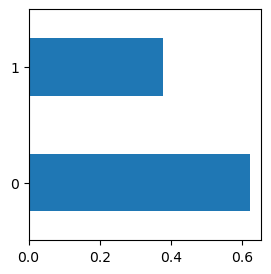

In [115]:
plt.figure(figsize=(3,3))
df.Converted.value_counts(normalize=True).plot.barh()
plt.show()

- We can see that lead conversion rate is approx 38%.

### LOOKING AT CORRELATION

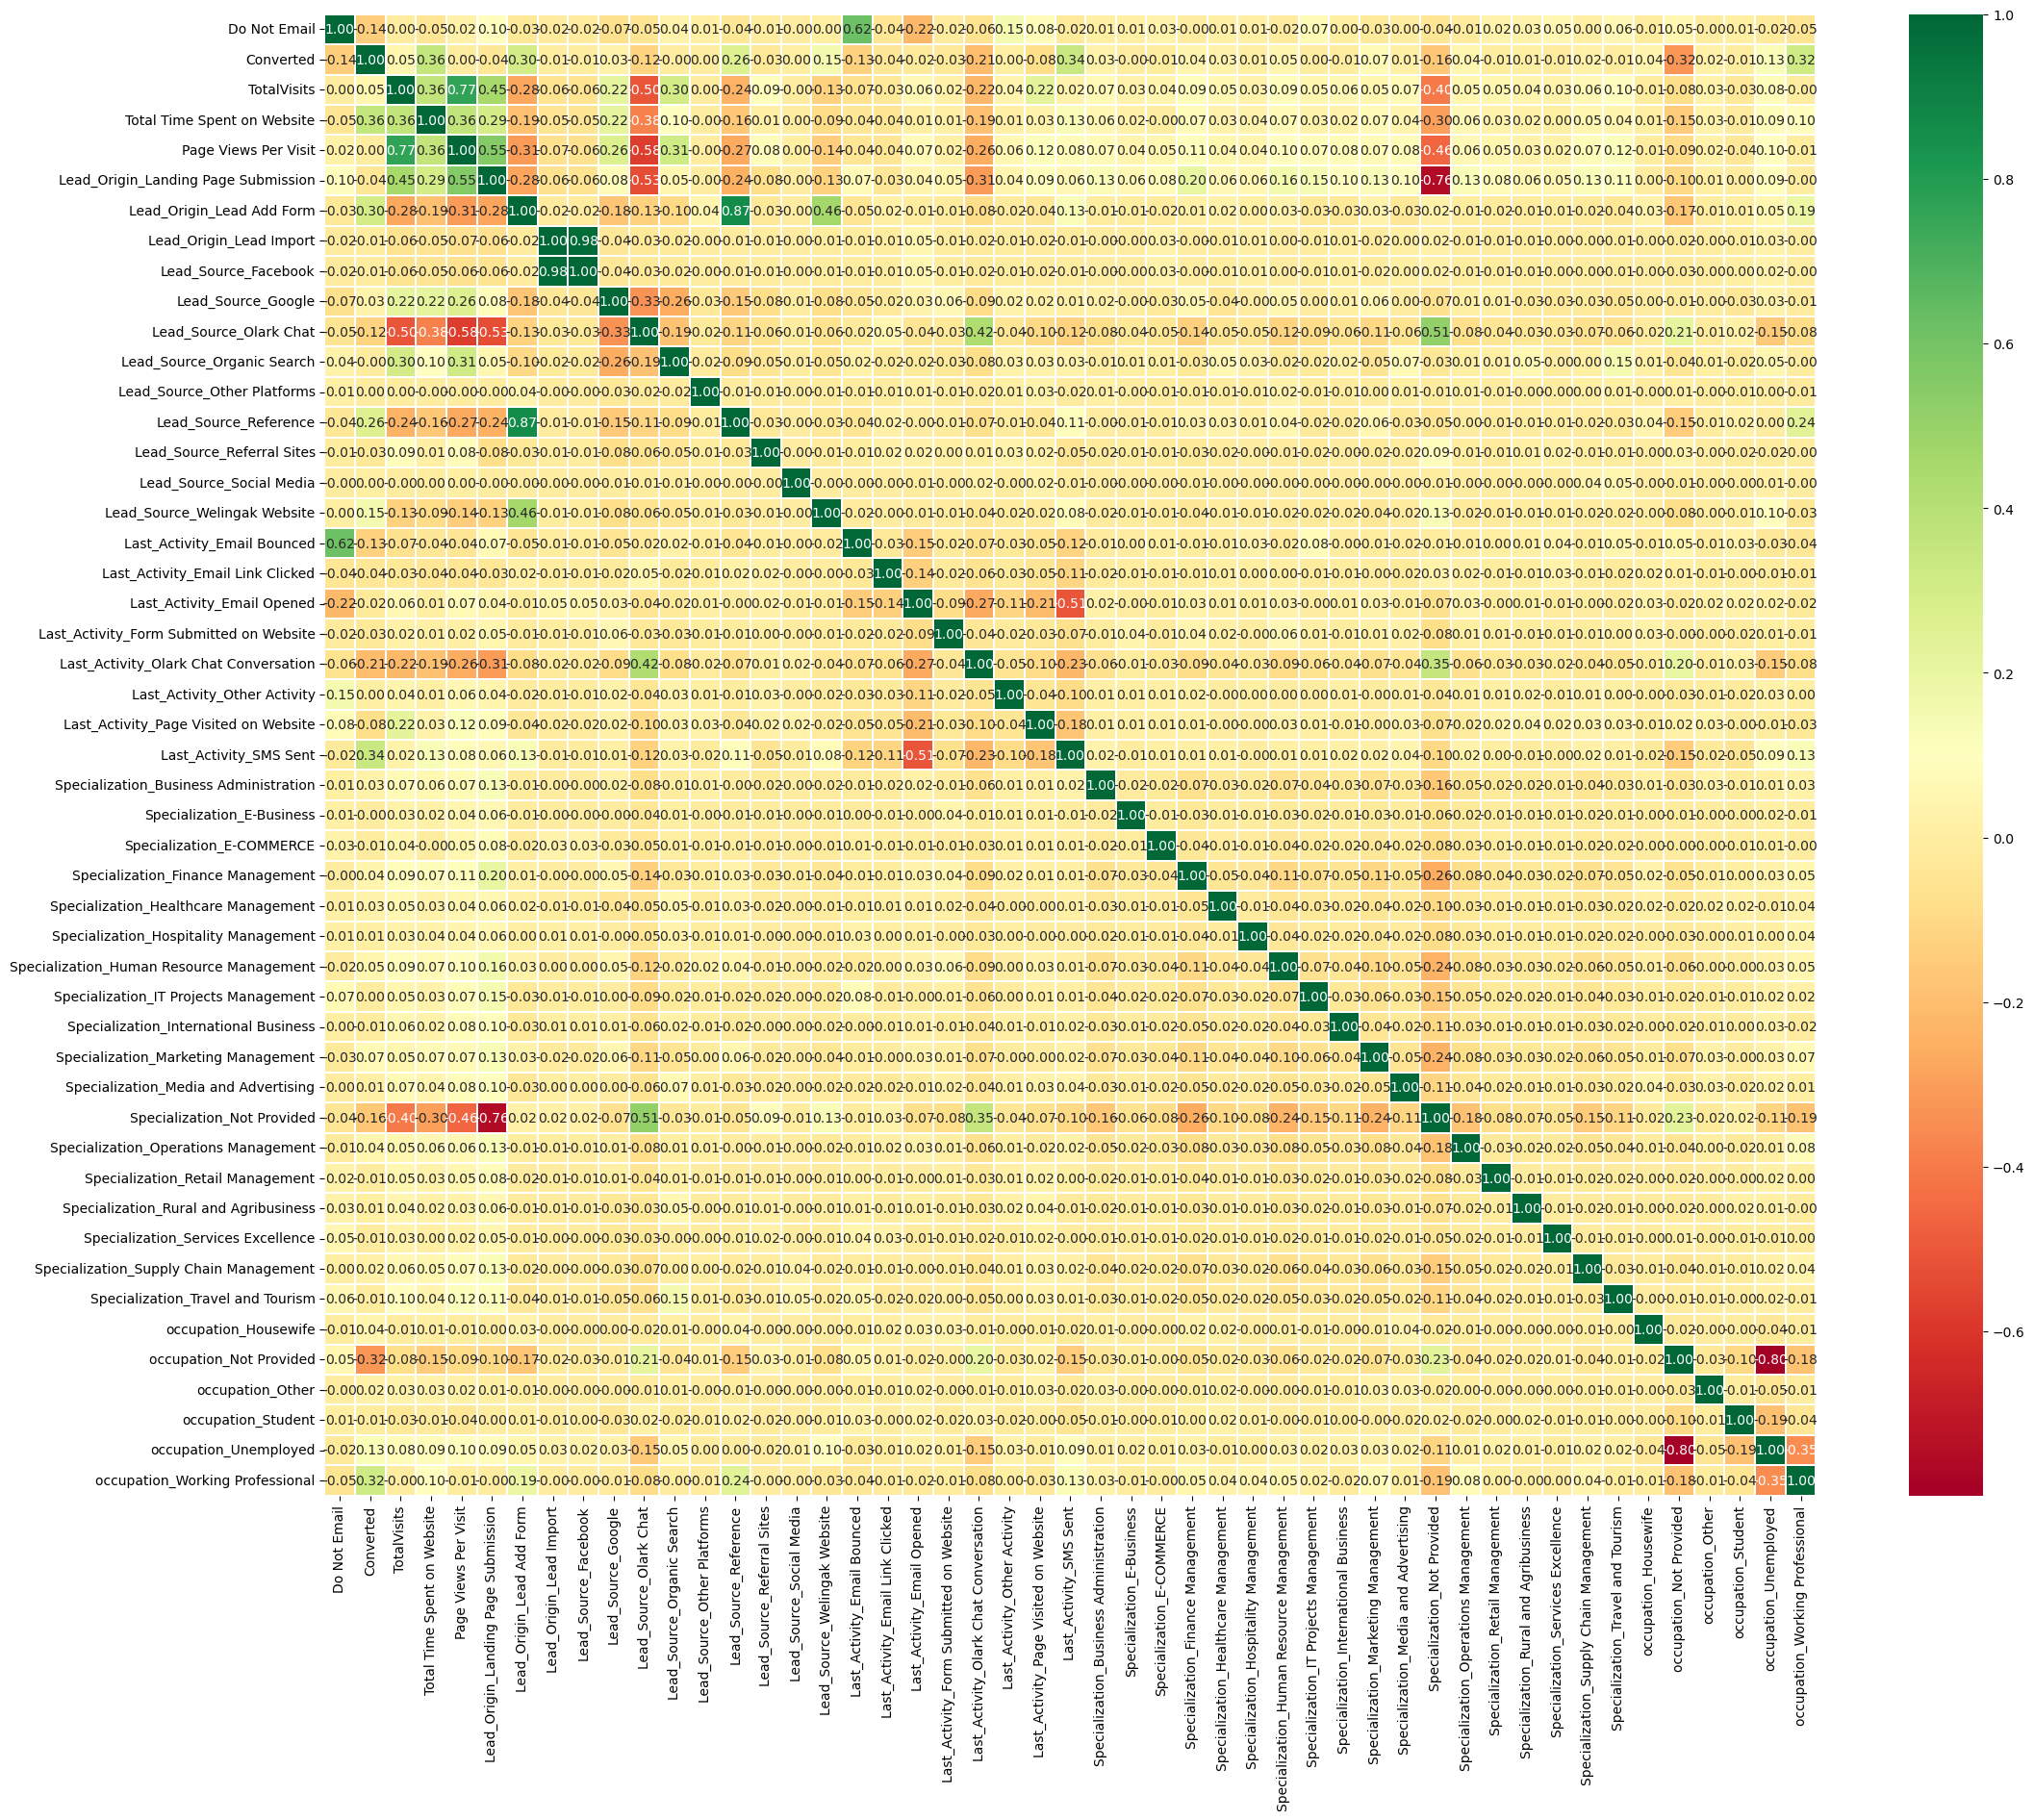

In [246]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap='RdYlGn',linewidths=0.25,annot=True, fmt=".2f")
plt.show()

#### - Dropping the highly corelated variables

In [117]:
high_cor=['Specialization_Not Provided','occupation_Not Provided','Lead_Origin_Lead Import']
X_train=X_train.drop(high_cor,axis=1)
X_test= X_test.drop(high_cor,axis=1)

#### - Again checking the correlation

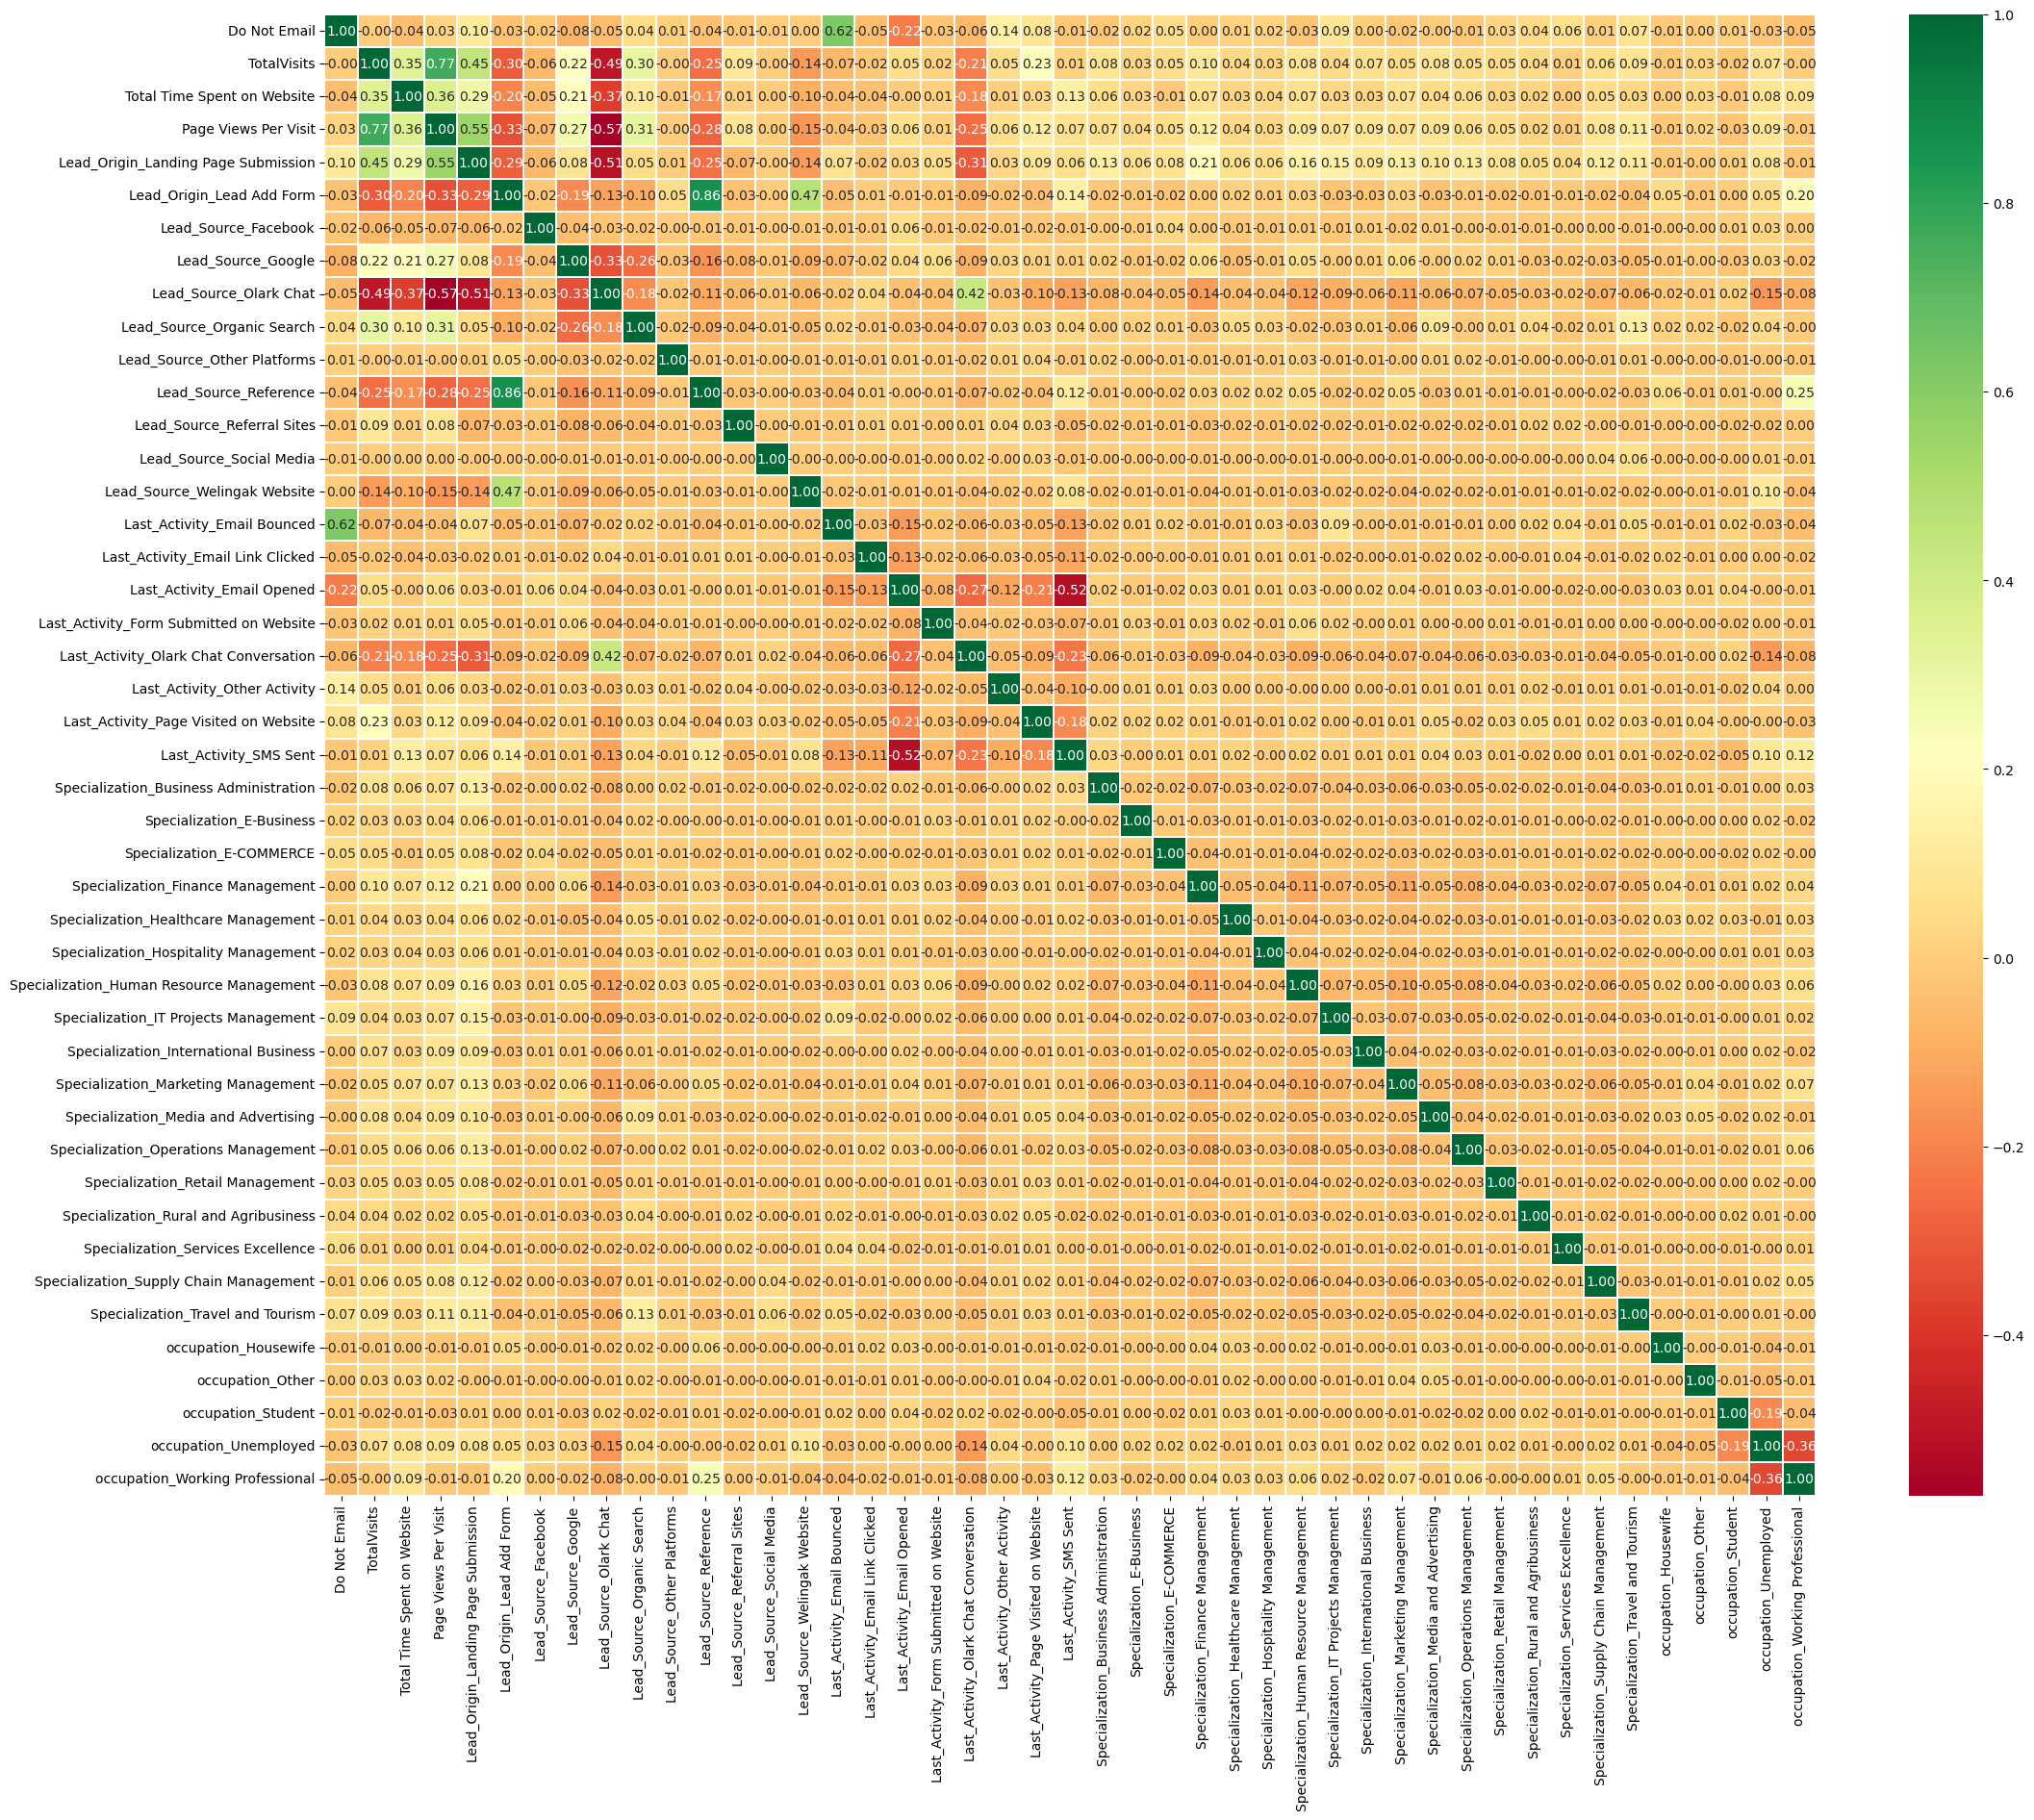

In [118]:
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(),cmap='RdYlGn',linewidths=0.25,annot=True, fmt=".2f")
plt.show()
plt.show()

Dropping 'Last_Activity_SMS Sent' column

In [119]:
X_train=X_train.drop(['Last_Activity_SMS Sent'],axis=1)
X_test= X_test.drop(['Last_Activity_SMS Sent'],axis=1)

### 4. MODEL BUILDING

#### MODEL 1

In [120]:
# importing lib
import statsmodels.api as sm

In [121]:
# Logistic regression model
lm1=sm.add_constant(X_train)
lm1=sm.GLM(y_train,X_train,family=sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.6
Date:                Mon, 18 Sep 2023   Deviance:                       5311.1
Time:                        23:23:29   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Do Not Email                                -1.4932      0.202     -7.400      0.000      -1.889      -1.098
TotalVisits                                  0.4456      0.055      8.145      0.000       0.338       0.553
Total Time Spent on Website                  1.1038      0.041     27.041      0.000       1.024       1.184
Page Views Per Visit                        -0.1448      0.060     -2.400      0.016      -0.263      -0.027
Lead_Origin_Landing Page Submission         -1.2030      0.110    -10.926      0.000      -1.419      -0.987
Lead_Origin_Lead Add Form                    0.8863      1.047      0.847      0.397      -1.165       2.938
Lead_Source_Facebook                         0.4557      0.470      0.969      0.333      -0.466       1.377
Lead_Source_Google                          -0.2637      0.077     -3.444      0.001      -0.414      -0.114
Lead_Source_Olark Chat                       0.8793      0.127      6.903      0.000       0.630       1.129
Lead_Source_Organic Search                  -0.6646      0.113     -5.882      0.000      -0.886      -0.443
Lead_Source_Other Platforms                  0.6209      0.725      0.857      0.392      -0.799       2.041
Lead_Source_Reference                        2.1628      1.067      2.027      0.043       0.071       4.254
Lead_Source_Referral Sites                  -1.1060      0.334     -3.313      0.001      -1.760      -0.452
Lead_Source_Social Media                     1.8956      1.583      1.197      0.231      -1.208       4.999
Lead_Source_Welingak Website                 4.3585      1.274      3.421      0.001       1.861       6.856
Last_Activity_Email Bounced                 -1.9459      0.415     -4.683      0.000      -2.760      -1.132
Last_Activity_Email Link Clicked            -1.6259      0.214     -7.607      0.000      -2.045      -1.207
Last_Activity_Email Opened                  -1.2260      0.075    -16.394      0.000      -1.373      -1.079
Last_Activity_Form Submitted on Website     -1.8745      0.347     -5.409      0.000      -2.554      -1.195
Last_Activity_Olark Chat Conversation       -2.8251      0.170    -16.596      0.000      -3.159      -2.491
Last_Activity_Other Activity                -0.3504      0.220     -1.596      0.111      -0.781       0.080
Last_Activity_Page Visited on Website       -1.8781      0.157    -11.988      0.000      -2.185      -1.571
Specialization_Business Administration       0.3193      0.194      1.644      0.100      -0.061       0.700
Specialization_E-Business                    0.7294      0.420      1.737      0.082      -0.093       1.552
Specialization_E-COMMERCE                    0.4567      0.324      1.410      0.159      -0.178       1.092
Specialization_Finance Manageme

### 5.FEATURE SELECTION USING RFE 

In [122]:
# importing library
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [123]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [124]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True])

In [125]:
# Rank and supported columns 
list(zip(X_train,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead_Origin_Landing Page Submission', False, 8),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Facebook', False, 3),
 ('Lead_Source_Google', False, 19),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 30),
 ('Lead_Source_Other Platforms', False, 18),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 7),
 ('Lead_Source_Social Media', False, 5),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 2),
 ('Last_Activity_Email Opened', False, 4),
 ('Last_Activity_Form Submitted on Website', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Other Activity', False, 27),
 ('Last_Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Spe

In [126]:
# columns which supports 
cols=X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'occupation_Housewife',
       'occupation_Other', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional'],
      dtype='object')

In [127]:
# columns which are not supporting
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Other Platforms', 'Lead_Source_Referral Sites',
       'Lead_Source_Social Media', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Other Activity',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusi

#### MODEL 2

In [128]:
# building model 2 with the supporting columns
X_train_sm=sm.add_constant(X_train[cols])
lm2= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.6
Date:                Mon, 18 Sep 2023   Deviance:                       5471.3
Time:                        23:23:33   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3760
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8810      0.082    -22.911      0.000      -2.042      -1.720
Do Not Email                               -1.0257      0.192     -5.340      0.000      -1.402      -0.649
Total Time Spent on Website                 1.1427      0.039     28.934      0.000       1.065       1.220
Lead_Origin_Lead Add Form                   1.9525      0.891      2.191      0.028       0.206       3.699
Lead_Source_Olark Chat                      1.4077      0.103     13.728      0.000       1.207       1.609
Lead_Source_Reference                       1.7227      0.916      1.881      0.060      -0.072       3.517
Lead_Source_Welingak Website                3.7650      1.147      3.281      0.001       1.516       6.014
Last_Activity_Email Bounced                -1.7415      0.409     -4.261      0.000      -2.543      -0.940
Last_Activity_Form Submitted on Website    -1.0847      0.342     -3.175      0.001      -1.754      -0.415
Last_Activity_Olark Chat Conversation      -1.8288      0.161    -11.344      0.000      -2.145      -1.513
Last_Activity_Page Visited on Website      -0.8732      0.146     -5.976      0.000      -1.160      -0.587
occupation_Housewife                       23.4773   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
occupation_Other                            1.8210      0.743      2.450      0.014       0.364       3.278
occupation_Student                          1.1695      0.221      5.292      0.000       0.736       1.603
occupation_Unemployed                       1.3016      0.085     15.257      0.000       1.134       1.469
occupation_Working Professional             3.7289      0.195     19.146      0.000       3.347       4.111
===========================================================================================================
"""

##### Checking VIF

In [129]:
# importing lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
# Creating VIF function
def VIF():
    vif= pd.DataFrame()
    vif['feature']= X_train[cols].columns
    vif['VIF']=[variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif= vif.sort_values(by= 'VIF',ascending=False)
    return vif


In [131]:
VIF()

,feature,VIF
2,Lead_Origin_Lead Add Form,62.49
4,Lead_Source_Reference,48.11
5,Lead_Source_Welingak Website,15.47
0,Do Not Email,1.80
6,Last_Activity_Email Bounced,1.74
3,Lead_Source_Olark Chat,1.60
8,Last_Activity_Olark Chat Conversation,1.34
13,occupation_Unemployed,1.31
1,Total Time Spent on Website,1.29
14,occupation_Working Professional,1.15


##### We can see that the column 'Lead_Source_Reference' has high value of p-value as well as high VIF.So,Dropping the column from rfe selected column and again running the model

In [132]:
# droping the column from the selected rfe columns
cols=cols.drop('Lead_Source_Reference')

In [133]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'occupation_Housewife',
       'occupation_Other', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional'],
      dtype='object')

#### MODEL 3

In [134]:
# Building the model 3 with selected columsn
X_train_sm=sm.add_constant(X_train[cols])

lm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.1
Date:                Mon, 18 Sep 2023   Deviance:                       5474.1
Time:                        23:23:33   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8803      0.082    -22.903      0.000      -2.041      -1.719
Do Not Email                               -1.0210      0.192     -5.324      0.000      -1.397      -0.645
Total Time Spent on Website                 1.1421      0.039     28.917      0.000       1.065       1.219
Lead_Origin_Lead Add Form                   3.6088      0.217     16.663      0.000       3.184       4.033
Lead_Source_Olark Chat                      1.4057      0.103     13.703      0.000       1.205       1.607
Lead_Source_Welingak Website                2.1074      0.753      2.799      0.005       0.632       3.583
Last_Activity_Email Bounced                -1.7459      0.409     -4.273      0.000      -2.547      -0.945
Last_Activity_Form Submitted on Website    -1.0829      0.341     -3.173      0.002      -1.752      -0.414
Last_Activity_Olark Chat Conversation      -1.8278      0.161    -11.341      0.000      -2.144      -1.512
Last_Activity_Page Visited on Website      -0.8764      0.146     -5.991      0.000      -1.163      -0.590
occupation_Housewife                       23.4842   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
occupation_Other                            1.8213      0.743      2.450      0.014       0.364       3.278
occupation_Student                          1.1719      0.221      5.309      0.000       0.739       1.605
occupation_Unemployed                       1.3010      0.085     15.252      0.000       1.134       1.468
occupation_Working Professional             3.7311      0.195     19.166      0.000       3.350       4.113
===========================================================================================================
"""

##### Checking the VIF

In [135]:
VIF()

,feature,VIF
0,Do Not Email,1.80
5,Last_Activity_Email Bounced,1.74
2,Lead_Origin_Lead Add Form,1.61
3,Lead_Source_Olark Chat,1.60
7,Last_Activity_Olark Chat Conversation,1.34
4,Lead_Source_Welingak Website,1.33
12,occupation_Unemployed,1.31
1,Total Time Spent on Website,1.29
13,occupation_Working Professional,1.15
8,Last_Activity_Page Visited on Website,1.09


##### Now removing 'occupation_Housewife' from selected columns

In [136]:
cols=cols.drop('occupation_Housewife')

In [137]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'occupation_Other',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional'],
      dtype='object')

#### MODEL 4

In [138]:
# Building the model 4 from the selected columns
X_train_sm= sm.add_constant(X_train[cols])
lm4= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.6
Date:                Mon, 18 Sep 2023   Deviance:                       5487.3
Time:                        23:23:34   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3744
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8588      0.081    -22.825      0.000      -2.018      -1.699
Do Not Email                               -1.0255      0.192     -5.346      0.000      -1.402      -0.650
Total Time Spent on Website                 1.1416      0.039     28.949      0.000       1.064       1.219
Lead_Origin_Lead Add Form                   3.6479      0.217     16.838      0.000       3.223       4.072
Lead_Source_Olark Chat                      1.3990      0.102     13.656      0.000       1.198       1.600
Lead_Source_Welingak Website                2.0685      0.753      2.747      0.006       0.593       3.544
Last_Activity_Email Bounced                -1.7440      0.409     -4.269      0.000      -2.545      -0.943
Last_Activity_Form Submitted on Website    -1.0870      0.341     -3.185      0.001      -1.756      -0.418
Last_Activity_Olark Chat Conversation      -1.8306      0.161    -11.363      0.000      -2.146      -1.515
Last_Activity_Page Visited on Website      -0.8799      0.146     -6.018      0.000      -1.166      -0.593
occupation_Other                            1.8031      0.744      2.425      0.015       0.346       3.260
occupation_Student                          1.1510      0.221      5.216      0.000       0.718       1.583
occupation_Unemployed                       1.2800      0.085     15.116      0.000       1.114       1.446
occupation_Working Professional             3.7094      0.194     19.078      0.000       3.328       4.090
===========================================================================================================
"""

##### Checking VIF

In [139]:
VIF()

,feature,VIF
0,Do Not Email,1.80
5,Last_Activity_Email Bounced,1.74
2,Lead_Origin_Lead Add Form,1.60
3,Lead_Source_Olark Chat,1.60
7,Last_Activity_Olark Chat Conversation,1.34
4,Lead_Source_Welingak Website,1.33
11,occupation_Unemployed,1.31
1,Total Time Spent on Website,1.29
12,occupation_Working Professional,1.15
8,Last_Activity_Page Visited on Website,1.09


- It looks that all variables has good p-value and VIF.So, we not need to drop more columns
- p-value and VIF are under acceptable range

##### PREDICTING THE TRAIN SET

In [140]:
y_train_pred= res.predict(X_train_sm)
y_train_pred.head()

3009    0.114893
1012    0.177194
9226    0.451580
4750    0.504289
7987    0.848692
dtype: float64

In [141]:
# Making array of the predicted values
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11489291, 0.17719442, 0.45157988, 0.50428927, 0.84869236,
       0.6148389 , 0.05391949, 0.8312517 , 0.92754687, 0.82377888])

In [142]:
y_train_pred.shape

(6351,)

In [143]:
y_train.shape

(6351,)

In [144]:
y_train_pred_final=pd.DataFrame({"converted":y_train.values,'converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,Prospect ID
0,0,0.114893,3009
1,0,0.177194,1012
2,0,0.451580,9226
3,1,0.504289,4750
4,1,0.848692,7987


Now we need to find the optimal cutoff for converter_prob,Lets keep the cutoff value 0.5 just to get an idea of accuracy,confusion matrix


In [145]:
# creating new column 'predicted' with 1 if 'converted_prob' >0.5 else 0
y_train_pred_final['predicted']= y_train_pred_final['converted_prob'].map(lambda x: 1 if x>0.5 else 0)

In [146]:
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,predicted
0,0,0.114893,3009,0
1,0,0.177194,1012,0
2,0,0.451580,9226,0
3,1,0.504289,4750,1
4,1,0.848692,7987,1


### 6. MODEL EVALUATION
- ACCURACY
- CONFUSION MATRIX
 - SENSITIVITY & SPECIFICITY
 - ROC & FINDING OPTIMAL 
 - Precision & Recall

#### Accuracy

In [147]:
# importing library
from sklearn import metrics

In [148]:
print(metrics.accuracy_score(y_train_pred_final.converted,y_train_pred_final.predicted))

0.8008187686978429


#### Confusion matrix

In [149]:
confusion=metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.predicted)
confusion

array([[3491,  414],
       [ 851, 1595]], dtype=int64)

In [150]:
# Actual/Predicted   not_converted  converted
#   not_converted     3491           414
#   converted         851            1595

# [ True Negatives (TN)   False Positives (FP) ]
# [ False Negatives (FN)  True Positives (TP)  ]

##### Metric Beyond Simply Accuracy

In [151]:
TP= confusion[1,1] #true positive
TN= confusion[0,0] #true negative
FP= confusion[0,1] #false positive
FN= confusion[1,0] #false negative

######  - Sensitivity

In [152]:
# sensitivity of the model
TP/float(TP+FN)

0.6520850367947669

######  - Specificity

In [153]:
TN/(TN+FP)

0.8939820742637644

-  False-positive rate : 
- predicting conversion when customer does not converted

In [154]:
print(FP/float(TN+FP))

0.1060179257362356


-  Positive predicted value

In [155]:
print(TP/float(TP+FP))

0.7939273270283723


- Negative predicted value

In [156]:
print(TN/float(TN+FN))

0.8040073698756334


#### Plotting the ROC(RECIEVER OPERATING CHARACTERISTIC) curve
- Trade off between Senstivity and Specificity
- Trade off between True positive rate and false positive rate(1- specificity)

In [157]:
def roc_curve(actual,prob):
    fpr,tpr,thresholds= metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label= 'ROC CURVE(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.title('Reciever operating characteristics curve')
    plt.xlabel('False Positive Rate(1-True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
    plt.show()

    return None

In [158]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.converted,y_train_pred_final.predicted,drop_intermediate=False)

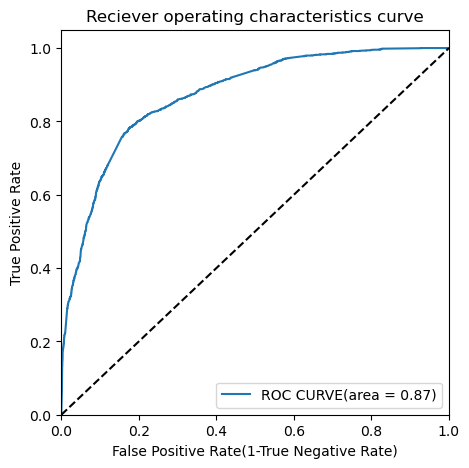

In [159]:
roc_curve(y_train_pred_final.converted,y_train_pred_final.converted_prob)

- From the Graph,it looks that curve area is 0.87 out of 1 which indicates good predictive model
- The curve is in upper left side that indicates good decent model

#### Finding the Optimal Cutoff Point
- The cutoff point where sensitivity and specificity are balanced 

In [160]:
# Lets create columns with different probablity cutoff
num=[float(i/10) for i in range(10)]
for a in num:
    y_train_pred_final[a]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > a else 0)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.114893,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.177194,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.451580,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.504289,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.848692,7987,1,1,1,1,1,1,1,1,1,1,0


 - Now calculating the accuracy,sensitivity,specificity for different cutoffs

In [161]:
from sklearn.metrics import confusion_matrix
cutoff_df= pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
num=[float(i/10) for i in range(10)]


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for a in num:
    c_m= metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final[a])
    accuracy=metrics.accuracy_score(y_train_pred_final.converted,y_train_pred_final[a])
    sensitivity=c_m[1,1]/(c_m[1,1]+c_m[1,0]) 
    specificity=c_m[0,0]/(c_m[0,0]+c_m[0,1])
    cutoff_df.loc[a]=[a,accuracy,sensitivity,specificity]

print(cutoff_df)    

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.590301     0.980785     0.345711
0.2   0.2  0.714061     0.907604     0.592830
0.3   0.3  0.783971     0.827473     0.756722
0.4   0.4  0.808219     0.778005     0.827145
0.5   0.5  0.800819     0.652085     0.893982
0.6   0.6  0.786648     0.579722     0.916261
0.7   0.7  0.767123     0.492232     0.939309
0.8   0.8  0.739096     0.376942     0.965941
0.9   0.9  0.691230     0.210139     0.992574


##### Plotting accuracy,sensitivity and specificity for different probablities

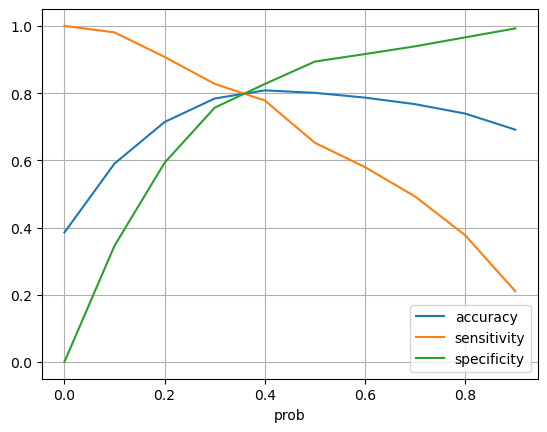

In [165]:
# Plotting 
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.grid(True)
plt.show()

###### From the curve we can find the optimal cutoff is 0.35,Now adding new predicted column using the optimal cutoff 

In [230]:
y_train_pred_final['final_predicted']= y_train_pred_final.converted_prob.map(lambda x:1 if x> 0.35 else 0)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score,final_predicted_p_r
0,0,0.114893,3009,0,1,1,0,0,0,0,0,0,0,0,0,11,0
1,0,0.177194,1012,0,1,1,0,0,0,0,0,0,0,0,0,18,0
2,0,0.451580,9226,0,1,1,1,1,1,0,0,0,0,0,1,45,1
3,1,0.504289,4750,1,1,1,1,1,1,1,0,0,0,0,1,50,1
4,1,0.848692,7987,1,1,1,1,1,1,1,1,1,1,0,1,85,1


###### Accuracy

In [231]:
print(metrics.accuracy_score(y_train_pred_final.converted,y_train_pred_final.final_predicted))

0.8022358683671863


###### Confusion matrix

In [232]:
confusion1= metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.final_predicted)
confusion

array([[3137,  768],
       [ 488, 1958]], dtype=int64)

In [234]:
TP= confusion1[1,1] #true positive
TN= confusion1[0,0] #true negative
FP= confusion1[0,1] #false positive
FN= confusion1[1,0] #false negative

###### Sensitivity

In [235]:
print(TP/float(TP+FN))

0.8004905968928864


###### Specificity

In [236]:
print(TN/float(TN+FP))

0.8033290653008963


- False positive rate

In [237]:
print(FP/float(TN+FP))

0.1966709346991037


- Positive predictive value

In [238]:
print(TP/float(TP+FP))

0.7182685253118122


- Negative Predictive value

In [175]:
print(TN/float(TN+FN))

0.8653793103448276


#### Results: Running model on test set with 0.35 Optimal cutoff
- ACCURACY: 80.22 %
- SENSITIVITY: 80.04 % 
- SPECIFICITY: 80.33 % 
- The range is approx 80% that indicates that Cutoff point can make good balance between Accuracy,Sensitivity,Specificity

##### Adding Lead score column to the Train dataframe
- A higher lead score means the lead is hot, i.e. is most likely to convert.
- A lower lead score means that the lead is cold and will mostly not get converted.

In [176]:
y_train_pred_final['Lead_score']=y_train_pred_final['converted_prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,0,0.114893,3009,0,1,1,0,0,0,0,0,0,0,0,0,11
1,0,0.177194,1012,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.451580,9226,0,1,1,1,1,1,0,0,0,0,0,1,45
3,1,0.504289,4750,1,1,1,1,1,1,1,0,0,0,0,1,50
4,1,0.848692,7987,1,1,1,1,1,1,1,1,1,1,0,1,85


#### PRCISION AND RECALL 
- Similar to sensitivity and specificity 
- Using  above cuttoff's predicted values

In [177]:
# Looking at the confusion matrix again
confusion=metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.final_predicted)
confusion

array([[3137,  768],
       [ 488, 1958]], dtype=int64)


###### - Precision
TP/(TP+FP)

In [178]:
confusion[1,1]/float((confusion[1,1]+confusion[0,1]))

0.7182685253118122

##### - Recall
TP/(TP+FN)

In [179]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.8004905968928864

###### Using sklearn fot precision and recall

In [181]:
# importing lib
from sklearn.metrics import precision_score,recall_score

Finding precision and recall using above cuttoff's predicted values

In [182]:

# PRECISION
precision_score(y_train_pred_final.converted,y_train_pred_final.final_predicted)

0.7182685253118122

In [183]:
# RECALL
recall_score(y_train_pred_final.converted,y_train_pred_final.final_predicted)

0.8004905968928864

#### Precision and Recall trade off
- finding the optimal cutoff

In [184]:
from sklearn.metrics import precision_recall_curve

In [185]:
y_train_pred_final.converted,y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [186]:
p,r,threshold= precision_recall_curve(y_train_pred_final.converted,y_train_pred_final.converted_prob)

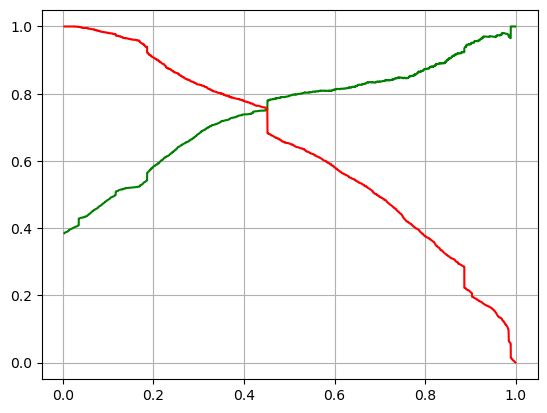

In [187]:
plt.plot(threshold,p[:-1],'g-')
plt.plot(threshold,r[:-1],'r-')
plt.grid(True)
plt.show()

- From graph,taking the optimal cutoff around 0.42 .So, taking 0.42 for finding the precision and recall
- Adding new column for the predicted value taken from the cutoff for precision and recall 
- green is precision and red is recall

In [195]:
y_train_pred_final['final_predicted_p_r']=y_train_pred_final.converted_prob.map(lambda x:1 if x>0.42 else 0)
y_train_pred_final

,converted,converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score,final_predicted_p_r
0,0,0.114893,3009,0,1,1,0,0,0,0,0,0,0,0,0,11,0
1,0,0.177194,1012,0,1,1,0,0,0,0,0,0,0,0,0,18,0
2,0,0.451580,9226,0,1,1,1,1,1,0,0,0,0,0,1,45,1
3,1,0.504289,4750,1,1,1,1,1,1,1,0,0,0,0,1,50,1
4,1,0.848692,7987,1,1,1,1,1,1,1,1,1,1,0,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.113178,367,0,1,1,0,0,0,0,0,0,0,0,0,11,0
6347,1,0.903359,82,1,1,1,1,1,1,1,1,1,1,1,1,90,1
6348,0,0.886413,8199,1,1,1,1,1,1,1,1,1,1,0,1,89,1
6349,0,0.318455,7077,0,1,1,1,1,0,0,0,0,0,0,1,32,0


In [196]:
# confusion matrix
confusion2=metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.final_predicted_p_r)
confusion2

array([[3266,  639],
       [ 566, 1880]], dtype=int64)

###### Accuracy

In [197]:
print(metrics.accuracy_score(y_train_pred_final.converted,y_train_pred_final.final_predicted_p_r))

0.810266099826799


###### Precision

In [198]:
print(precision_score(y_train_pred_final.converted,y_train_pred_final.final_predicted_p_r))

0.7463279078999603


###### Recall

In [199]:
print(recall_score(y_train_pred_final.converted,y_train_pred_final.final_predicted_p_r))

0.7686017988552739


###### The range is approx(76-80)% that indicates that Cutoff point can make good balance between Accuracy,Precision,Recall

### 7.Making Prediction On Test Set

##### - Scaling the data set

In [200]:
n_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [201]:
X_test[n_col]= scaler.transform(X_test[n_col])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
3271,0,0.284772,-0.600595,0.955505,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0.643547,1.887326,1.510766,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7936,0,-0.432779,-0.752879,-0.155018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3830,0,1.719873,-0.587751,2.066027,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [202]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'occupation_Other',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional'],
      dtype='object')

In [203]:
# Inputing the RFE supported column
X_test= X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,0,0,1
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,0


In [204]:
# Adding constant
X_test_sm= sm.add_constant(X_test)

##### - Making Prediction

In [205]:
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

3271    0.072805
1490    0.982103
7936    0.061907
4216    0.872765
3830    0.073801
1800    0.730139
6507    0.210307
4821    0.458885
4223    0.886413
4714    0.186299
dtype: float64

##### - Converting y_test_pred to data frame


In [206]:
y_pred_df=pd.DataFrame(y_test_pred)
y_pred_df[:10]

,0
3271,0.072805
1490,0.982103
7936,0.061907
4216,0.872765
3830,0.073801
1800,0.730139
6507,0.210307
4821,0.458885
4223,0.886413
4714,0.186299


##### - Converting y_test to data frame


In [207]:
y_test_df= pd.DataFrame(y_test)
y_test_df[:10]

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0
1800,1
6507,0
4821,0
4223,1
4714,0


##### - Concatinating & Modifying both dataframe 

In [208]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID']=y_test_df.index

# Removing index from both the df to append side by side
y_pred_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop= True,inplace=True)

# Appending y_pred_df and y_test_df
y_pred_final= pd.concat([y_test_df,y_pred_df],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.072805
1,1,1490,0.982103
2,0,7936,0.061907
3,1,4216,0.872765
4,0,3830,0.073801


In [209]:
# Renaming the columns
y_pred_final= y_pred_final.rename(columns={0:'Converted_prob'})
# Rearranging the columns
y_pred_final=y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'],axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.072805
1,1490,1,0.982103
2,7936,0,0.061907
3,4216,1,0.872765
4,3830,0,0.073801


### 8. Evaluation Test set
- Taking cutoff 0.35 as we took in train set for Sensitivity and Specificity

In [224]:
# Adding new column 'final_prediction' that predicts the converted_prob using cutoff 0.35
y_pred_final['final_predicted']= y_pred_final.Converted_prob.map(lambda x:1 if x> 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.072805,0,7
1,1490,1,0.982103,1,98
2,7936,0,0.061907,0,6
3,4216,1,0.872765,1,87
4,3830,0,0.073801,0,7


#####  - Draw ROC curve

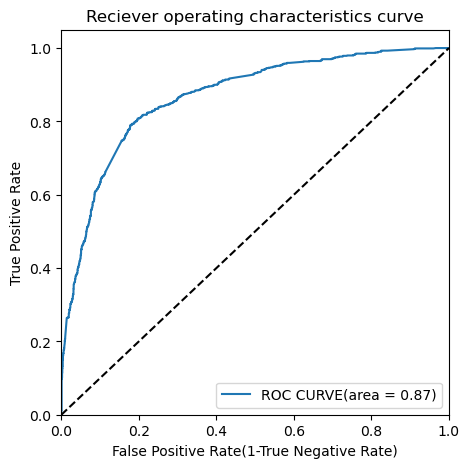

In [225]:
fpr,tpr,thresholds=metrics.roc_curve(y_pred_final.Converted,y_pred_final.final_predicted,drop_intermediate=False)
roc_curve(y_pred_final.Converted,y_pred_final.Converted_prob)

- The curve which is towards upper left corner indicates that model works very goof on the test set
- The area is .87 out of 1 which indicates good predictive model

#####  - Confusion matrix

In [226]:
c_m_test=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
c_m_test
TP = c_m_test[1,1] # true positive 
TN = c_m_test[0,0] # true negatives
FP = c_m_test[0,1] # false positives
FN = c_m_test[1,0] # false negatives

##### - Accuracy

In [227]:
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted))

0.8027910392948954


##### - Sensitivity

In [228]:
print(TP/float(TP+FN))

0.80788675429727


##### - Specificity

In [229]:
print(TN/float(TN+FP))

0.7998846597462514


#### Results: Running model on test set with 0.35 optimal cutoff 
- ACCURACY: 80.27% 
- SENSITIVITY: 80.78% 
- SPECIFICITY: 79.98%
- The range is in between 79-80 % that indicates good predictive model

In [216]:
res.params.sort_values(ascending= False)

occupation_Working Professional            3.709364
Lead_Origin_Lead Add Form                  3.647871
Lead_Source_Welingak Website               2.068482
occupation_Other                           1.803088
Lead_Source_Olark Chat                     1.398972
occupation_Unemployed                      1.279952
occupation_Student                         1.150970
Total Time Spent on Website                1.141557
Last_Activity_Page Visited on Website     -0.879898
Do Not Email                              -1.025525
Last_Activity_Form Submitted on Website   -1.087050
Last_Activity_Email Bounced               -1.744048
Last_Activity_Olark Chat Conversation     -1.830636
const                                     -1.858768
dtype: float64

#### INSIGHTS:
-  The magnitude of the coefficients indicates the strength of the influence. Larger coefficients, (positive or negative), suggest a more significant impact on the model's predictions.
- Features with larger positive coefficients (e.g., "occupation_Working Professional" and "Lead_Origin_Lead Add Form") have a stronger positive impact on the outcome variable.  
- Features with larger negative coefficients (e.g., "Do Not Email") have a stronger negative impact on the outcome variable

#### - Adding Lead score column to the test dataframe
- A higher lead score means the lead is hot, i.e. is most likely to convert.
- A lower lead score means that the lead is cold and will mostly not get converted.

In [217]:
y_pred_final['Lead_Score']= y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.072805,0,7
1,1490,1,0.982103,1,98
2,7936,0,0.061907,0,6
3,4216,1,0.872765,1,87
4,3830,0,0.073801,0,7


#### TRAIN - TEST SUMMARY
- TRAIN SET
   - ACCURACY: 80.22 %
   - SENSITIVITY: 80.04 %
   - SPECIFICITY: 80.33 % ≈ 78%
   

- TEST SET
   - ACCURACY: 80.27%
   - SENSITIVITY: 80.78%
   - SPECIFICITY: 79.98%

### 9. CONCLUSION:
- We took optimal cutoff based on Sensitivity and  Specificity for calculating the final prediction 
- Optimal cutoff 0.35 is best for model prediction as well as for balancing accuracy,sensitivity and specificity because
- The values of accuracy,sensitivity,specificity of test set are 80.27% ,80.78% and 79.98% respectively which are almost equal to the train set value.
- The sensitivity of the Train set is 80.04% and 80.78% for Test set.
-  We achieved the target given by the CEO that athe target lead conversion rate to be around 80%.
- The features responsible for conversion can be:
   - occupation_Working Professional
   - Lead_Origin_Lead Add Form 
   - Lead_Source_Welingak Website 